<a href="https://colab.research.google.com/github/9M3a1h3d9i9/Complexnet-rl-lab/blob/docs%2Fnotebook/Anaheim_Network_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In the name of Allah

## Mahdi CS 313
## 1404.07.27

# Anaheim Network Analysis







1.   **نسخه اول (آناهیم):**

 استفاده از دیتاست واقعی، اجرای GH آماده‌ی NetworkX، تحلیل گلوگاه‌ها، تعریف معیارها و تجسم


2.   **نسخه دوم (دستی):**

 پیاده‌سازی الگوریتم کلاسیک GH از صفر، تست روی گراف کوچک و تصادفی، اعتبارسنجی ویژگی‌ها




##  Install Dependencies


In [34]:
!pip install networkx pandas matplotlib requests

## Step 1: وارد کردن کتابخانه‌ها


In [35]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import requests, zipfile, io, os

#### zipfile, io, os: برای باز کردن فایل‌های فشرده و مدیریت مسیرها.

## Step 2: دانلود دیتاست آناهیم

In [36]:
url = "https://github.com/bstabler/TransportationNetworks/archive/refs/heads/master.zip"
response = requests.get(url)
zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall("./data")

network_path = "./data/TransportationNetworks-master/Anaheim"
print("Dataset extracted to:", network_path)

Dataset extracted to: ./data/TransportationNetworks-master/Anaheim


#### دیتاست شبکه‌های حمل‌ونقل از گیت‌هاب دانلود و در پوشه ./data استخراج می‌شود.

## Step 3: خواندن فایل شبکه (.net)


In [37]:
network_file = os.path.join(network_path, "Anaheim_net.tntp")
G = nx.DiGraph()  # Directed graph for transportation network

فایل .tntp شامل اطلاعات یال‌هاست

DiGraph: چون شبکه حمل‌ونقل جهت‌دار است

In [39]:


with open(network_file, 'r') as f:
    for line in f:
        if line.strip().startswith('~') or line.strip() == '' or line.startswith('<'):  # skip metadata
            continue
        parts = line.strip().split()
        if len(parts) >= 5:
            u = int(parts[0])
            v = int(parts[1])
            capacity = float(parts[2])
            G.add_edge(u, v, capacity=capacity)

print(f" Graph loaded: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")


 Graph loaded: 416 nodes, 914 edges


هر خط شامل: مبدأ، مقصد، ظرفیت و سایر ویژگی‌هاست

فقط ظرفیت را به‌عنوان وزن یال ذخیره می‌کنیم

## Step 4: آمار پایه


In [40]:
print("\n--- Basic Statistics ---")
print("Nodes:", G.number_of_nodes())
print("Edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values())/G.number_of_nodes())
print("Is strongly connected:", nx.is_strongly_connected(G))



--- Basic Statistics ---
Nodes: 416
Edges: 914
Average degree: 4.394230769230769
Is strongly connected: True


تعداد نودها و یال‌ها

میانگین درجه

بررسی strongly connected بودن

## Step 5: ساخت درخت گوموری–هو

In [41]:
UG = G.to_undirected()

ghtree = nx.gomory_hu_tree(UG)
print("\n Gomory–Hu tree constructed. Nodes:", ghtree.number_of_nodes(), "Edges:", ghtree.number_of_edges())



 Gomory–Hu tree constructed. Nodes: 416 Edges: 415


چون الگوریتم GH برای گراف‌های بدون‌جهت تعریف شده، گراف را بدون‌جهت می‌کنیم

nx.gomory_hu_tree: تابع آماده‌ی NetworkX برای ساخت درخت GH

## Step 6: پیدا کردن گلوگاه‌ها

(Minimum Cuts)

### Sort Gomory-Hu edges by weight (capacity)

In [42]:
mincuts = sorted(ghtree.edges(data=True), key=lambda x: x[2]['weight'])

print("\n--- Top 5 Minimum Cuts (Bottlenecks) ---")
for i, (u, v, data) in enumerate(mincuts[:5]):
    print(f"{i+1}. Edge ({u}, {v}) - Min-Cut Capacity: {data['weight']}")



--- Top 5 Minimum Cuts (Bottlenecks) ---
1. Edge (8, 411) - Min-Cut Capacity: 5400.0
2. Edge (411, 410) - Min-Cut Capacity: 5400.0
3. Edge (11, 309) - Min-Cut Capacity: 5400.0
4. Edge (309, 308) - Min-Cut Capacity: 5400.0
5. Edge (12, 275) - Min-Cut Capacity: 5400.0


یال‌های درخت GH بر اساس وزن (ظرفیت برش) مرتب می‌شوند و

یال با ظرفیت کم‌تر = گلوگاه مهم‌تر

## Step 7: تجسم


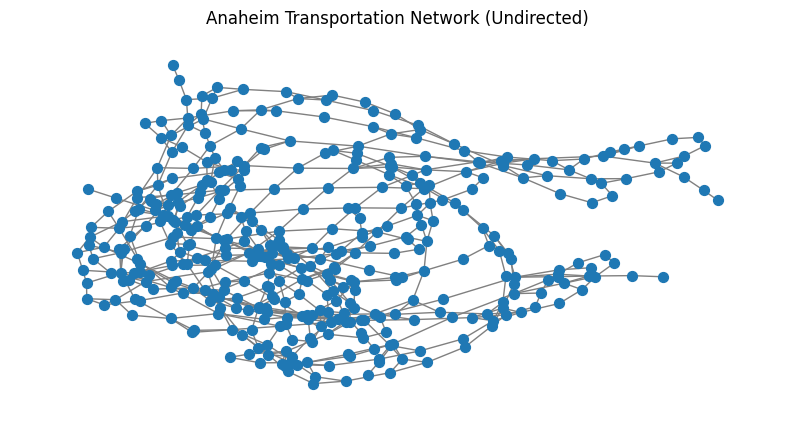

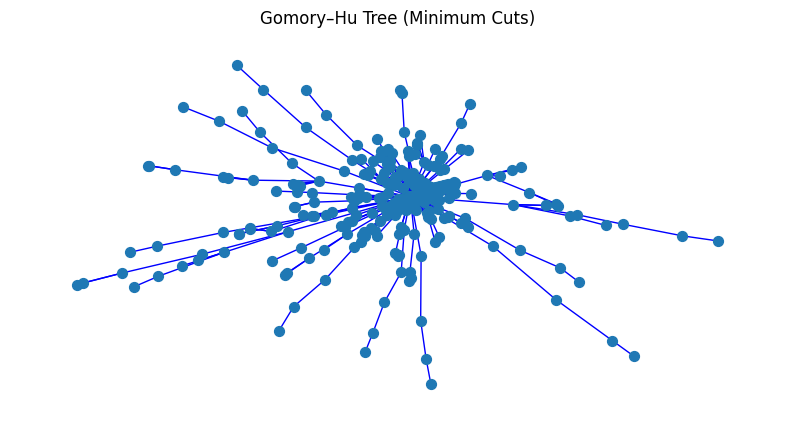


 Analysis complete. You can continue to RL Environment in the next step.


In [43]:
plt.figure(figsize=(10,5))
plt.title("Anaheim Transportation Network (Undirected)")
pos = nx.spring_layout(UG, seed=42)
nx.draw(UG, pos, node_size=50, edge_color='gray', with_labels=False)
plt.show()

plt.figure(figsize=(10,5))
plt.title("Gomory–Hu Tree (Minimum Cuts)")
pos_tree = nx.spring_layout(ghtree, seed=42)
nx.draw(ghtree, pos_tree, node_size=50, edge_color='blue', with_labels=False)
plt.show()

print("\n Analysis complete. You can continue to RL Environment in the next step.")


رسم گراف اصلی و درخت GH

---

استفاده از spring_layout برای جای‌گذاری نودها

# بخش اضافه: رنگ‌آمیزی گلوگاه‌ها و تعریف معیارها


**یال‌ها بر اساس ظرفیت به سه دسته تقسیم شدند:**


*   قرمز = خیلی بحرانی

*   نارنجی = بحرانی

*   زرد = مهم


**سه معیار تعریف شد:**


1.   رتبه بر اساس ظرفیت

2.   ظرفیت نرمال‌شده (۰ تا ۱)

3. اختلاف با بیشترین ظرفیت




نتایج در یک `DataFrame` نمایش داده شدند.

# Task
Visualize the minimum cuts from the Gomory-Hu tree on the original Anaheim network graph, coloring edges based on capacity (yellow-orange-red for important-critical-very critical). Define and calculate an evaluation metric for the cuts, such as the ratio of the number of cuts to the cut capacity, or the difference between pairs of cuts based on capacity. Present the results clearly.



---

حداقل برش‌ها را از درخت گوموری-هو بر روی گراف شبکه اصلی آناهایم تجزیه و تحلیل کنید و لبه‌ها را بر اساس ظرفیت رنگ‌آمیزی کنید (زرد-نارنجی-قرمز برای مهم-بحرانی-بسیار بحرانی). یک معیار ارزیابی برای برش‌ها تعریف و محاسبه کنید، مانند نسبت تعداد برش‌ها به ظرفیت برش یا تفاوت بین جفت‌های برش بر اساس ظرفیت. نتایج را به وضوح ارائه دهید.

## Visualization of minimum cuts

### Subtask:
Map the edges from the Gomory–Hu tree that correspond to the minimum cuts onto the original Anaheim network graph and color them based on their capacity (bottleneck level).


---

زمانی که لبه‌های درخت گموری-هو که به برش‌های حداقلی مربوط می‌شوند را روی گراف شبکه اصلی آناهایم نقشه‌برداری کنید و آن‌ها را بر اساس ظرفیتشان (سطح گلوگاه) رنگی کنید.

**Reasoning**:

Initialize edge colors to gray and then iterate through the minimum cuts to color the bottleneck edges based on their capacity.


---

رنگ‌های لبه را به رنگ خاکستری تنظیم کنید و سپس از روی برش‌های حداقلی عبور کنید تا لبه‌های گلوگاه را بر اساس ظرفیت آن‌ها رنگ‌آمیزی کنید.





Min min-cut capacity: 5400.0, Max min-cut capacity: 36000.0


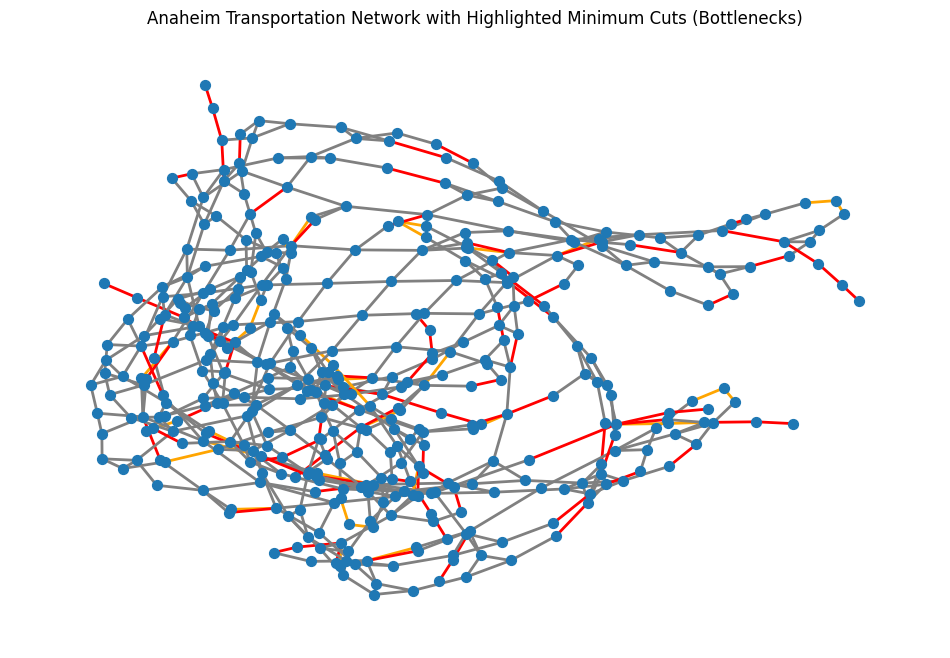

In [44]:
# Step 1: Initialize all edges in UG to gray
edge_colors = {edge: 'gray' for edge in UG.edges()}

# Step 2 & 3: Determine colors based on min-cut capacity and update edge_colors
# Define capacity thresholds for coloring (adjust as needed based on data distribution)
# Let's inspect the range of min-cut capacities
min_capacity = min(data['weight'] for u, v, data in mincuts)
max_capacity = max(data['weight'] for u, v, data in mincuts)
print(f"Min min-cut capacity: {min_capacity}, Max min-cut capacity: {max_capacity}")

# Define thresholds - these are examples, adjust based on the actual distribution
# For example, divide the range into three equal parts
capacity_range = max_capacity - min_capacity
very_critical_threshold = min_capacity + capacity_range / 3
critical_threshold = min_capacity + 2 * capacity_range / 3


for u, v, data in mincuts:
    capacity = data['weight']
    color = 'gray' # Default color if not a bottleneck (though mincuts contains only bottleneck edges)
    if capacity <= very_critical_threshold:
        color = 'red'  # Very critical
    elif capacity <= critical_threshold:
        color = 'orange' # Critical
    else:
        color = 'yellow' # Important

    # Step 4: Update edge_colors for the corresponding edges in UG (undirected)
    # Ensure the edge exists in the undirected graph
    if (u, v) in UG.edges():
        edge_colors[(u, v)] = color
    if (v, u) in UG.edges():
        edge_colors[(v, u)] = color

# Prepare the list of colors in the order of UG.edges()
edge_color_list = [edge_colors[edge] for edge in UG.edges()]

# Step 5 & 6: Plot the graph with colored edges
plt.figure(figsize=(12, 8))
plt.title("Anaheim Transportation Network with Highlighted Minimum Cuts (Bottlenecks)")
# Assuming 'pos' was defined in a previous step
nx.draw(UG, pos, node_size=50, edge_color=edge_color_list, with_labels=False, width=2)

# Step 8: Display the plot
plt.show()

**یال‌ها بر اساس ظرفیت به سه دسته تقسیم شدند:**


*   قرمز = خیلی بحرانی

*   نارنجی = بحرانی

*   زرد = مهم


**سه معیار تعریف شد:**


1.   رتبه بر اساس ظرفیت

2.   ظرفیت نرمال‌شده (۰ تا ۱)

3. اختلاف با بیشترین ظرفیت




نتایج در یک `DataFrame` نمایش داده شدند.

## Define evaluation metric(s)

### Subtask:
Develop a metric to compare the significance of the minimum cuts. The user suggested two options:
    - Ratio of demand flow to cut capacity. This requires demand data, which is not currently loaded.
    - Ratio of the number of cuts to the cut capacity, or the difference between pairs of cuts based on capacity.


**Reasoning**:
Calculate and define metrics for the significance of minimum cuts based on their capacity relative to each other, considering the lack of demand data.



In [45]:
# Metric 1: Simple Ranking by Capacity (already done in Step 6)
print("\n--- Minimum Cut Significance Metrics ---")
print("\nMetric 1: Rank by Capacity (Lower capacity means higher significance)")
for i, (u, v, data) in enumerate(mincuts[:10]):
    print(f"Rank {i+1}: Edge ({u}, {v}) - Capacity: {data['weight']}")

# Metric 2: Normalized Capacity (relative to the range of min-cut capacities)
# Lower normalized capacity means higher significance
print("\nMetric 2: Normalized Capacity (0-1 scale, lower is more significant)")
min_capacity = min(data['weight'] for u, v, data in mincuts)
max_capacity = max(data['weight'] for u, v, data in mincuts)
capacity_range = max_capacity - min_capacity

# Avoid division by zero if all min-cut capacities are the same
if capacity_range == 0:
    for u, v, data in mincuts[:10]:
         print(f"Edge ({u}, {v}) - Normalized Capacity: 1.0")
else:
    for u, v, data in mincuts[:10]:
        normalized_capacity = (data['weight'] - min_capacity) / capacity_range
        print(f"Edge ({u}, {v}) - Normalized Capacity: {normalized_capacity:.4f}")

# Metric 3: Difference from Maximum Capacity
# Larger difference means higher significance (as it's further from the largest bottleneck)
print("\nMetric 3: Difference from Maximum Capacity (Larger difference is more significant)")
for u, v, data in mincuts[:10]:
    capacity_difference = max_capacity - data['weight']
    print(f"Edge ({u}, {v}) - Capacity Difference: {capacity_difference:.2f}")

print("\nRationale for metrics:")
print("- Given the lack of demand data, these metrics focus solely on the capacity of the cuts relative to each other within the set of identified minimum cuts.")
print("- Ranking by capacity directly shows the smallest capacity cuts, which are intuitively the most significant bottlenecks based purely on flow limit.")
print("- Normalized capacity provides a relative measure on a 0-1 scale, making it easier to compare cuts regardless of the absolute capacity values.")
print("- Difference from maximum capacity highlights how much smaller a given cut's capacity is compared to the largest minimum cut, providing another perspective on relative severity.")
print("- These metrics are limited as they don't consider actual or potential flow/demand, which would provide a more complete picture of a bottleneck's impact.")



--- Minimum Cut Significance Metrics ---

Metric 1: Rank by Capacity (Lower capacity means higher significance)
Rank 1: Edge (8, 411) - Capacity: 5400.0
Rank 2: Edge (411, 410) - Capacity: 5400.0
Rank 3: Edge (11, 309) - Capacity: 5400.0
Rank 4: Edge (309, 308) - Capacity: 5400.0
Rank 5: Edge (12, 275) - Capacity: 5400.0
Rank 6: Edge (275, 274) - Capacity: 5400.0
Rank 7: Edge (13, 262) - Capacity: 5400.0
Rank 8: Edge (262, 273) - Capacity: 5400.0
Rank 9: Edge (14, 257) - Capacity: 5400.0
Rank 10: Edge (257, 258) - Capacity: 5400.0

Metric 2: Normalized Capacity (0-1 scale, lower is more significant)
Edge (8, 411) - Normalized Capacity: 0.0000
Edge (411, 410) - Normalized Capacity: 0.0000
Edge (11, 309) - Normalized Capacity: 0.0000
Edge (309, 308) - Normalized Capacity: 0.0000
Edge (12, 275) - Normalized Capacity: 0.0000
Edge (275, 274) - Normalized Capacity: 0.0000
Edge (13, 262) - Normalized Capacity: 0.0000
Edge (262, 273) - Normalized Capacity: 0.0000
Edge (14, 257) - Normalized C

## Calculate and present metrics

### Subtask:
Calculate the chosen metric(s) for the identified minimum cuts and present them in a clear format (e.g., a table or list).


**Reasoning**:
Create a list of dictionaries for the minimum cuts, convert it to a DataFrame, calculate the metrics (Rank, Normalized Capacity, Difference from Max Capacity), and display the resulting DataFrame for the top cuts.



In [46]:
# 1. Create a list of dictionaries for minimum cuts
min_cuts_list = []
for u, v, data in mincuts:
    min_cuts_list.append({'u': u, 'v': v, 'weight': data['weight']})

# 2. Convert the list of dictionaries into a Pandas DataFrame
df_min_cuts = pd.DataFrame(min_cuts_list)

# Get min and max capacity for normalization and difference calculation
min_capacity = df_min_cuts['weight'].min()
max_capacity = df_min_cuts['weight'].max()
capacity_range = max_capacity - min_capacity

# 3. Add "Rank by Capacity" column
df_min_cuts['Rank by Capacity'] = df_min_cuts['weight'].rank(method='min').astype(int)

# 4. Calculate "Normalized Capacity"
# Handle the case where max_capacity equals min_capacity
if capacity_range == 0:
    df_min_cuts['Normalized Capacity'] = 1.0
else:
    df_min_cuts['Normalized Capacity'] = (df_min_cuts['weight'] - min_capacity) / capacity_range

# 5. Calculate "Difference from Maximum Capacity"
df_min_cuts['Difference from Maximum Capacity'] = max_capacity - df_min_cuts['weight']

# 6. Print the DataFrame (top 20 cuts)
print("\n--- Minimum Cut Significance Metrics ---")
display(df_min_cuts.head(20))


--- Minimum Cut Significance Metrics ---


,u,v,weight,Rank by Capacity,Normalized Capacity,Difference from Maximum Capacity
0,8,411,5400.0,1,0.0,30600.0
1,411,410,5400.0,1,0.0,30600.0
2,11,309,5400.0,1,0.0,30600.0
3,309,308,5400.0,1,0.0,30600.0
4,12,275,5400.0,1,0.0,30600.0
5,275,274,5400.0,1,0.0,30600.0
6,13,262,5400.0,1,0.0,30600.0
7,262,273,5400.0,1,0.0,30600.0
8,14,257,5400.0,1,0.0,30600.0
9,257,258,5400.0,1,0.0,30600.0


## Enhance visualization

### Subtask:
Update the visualization to include the chosen metric(s) or provide a separate visualization that helps understand the significance of the bottlenecks based on the metric.


**Reasoning**:
Plot the original graph with colored edges and add a scatter plot overlay to visualize the 'Rank by Capacity' metric, including a legend.



## 1. آماده‌سازی شکل و رسم گراف اصلی

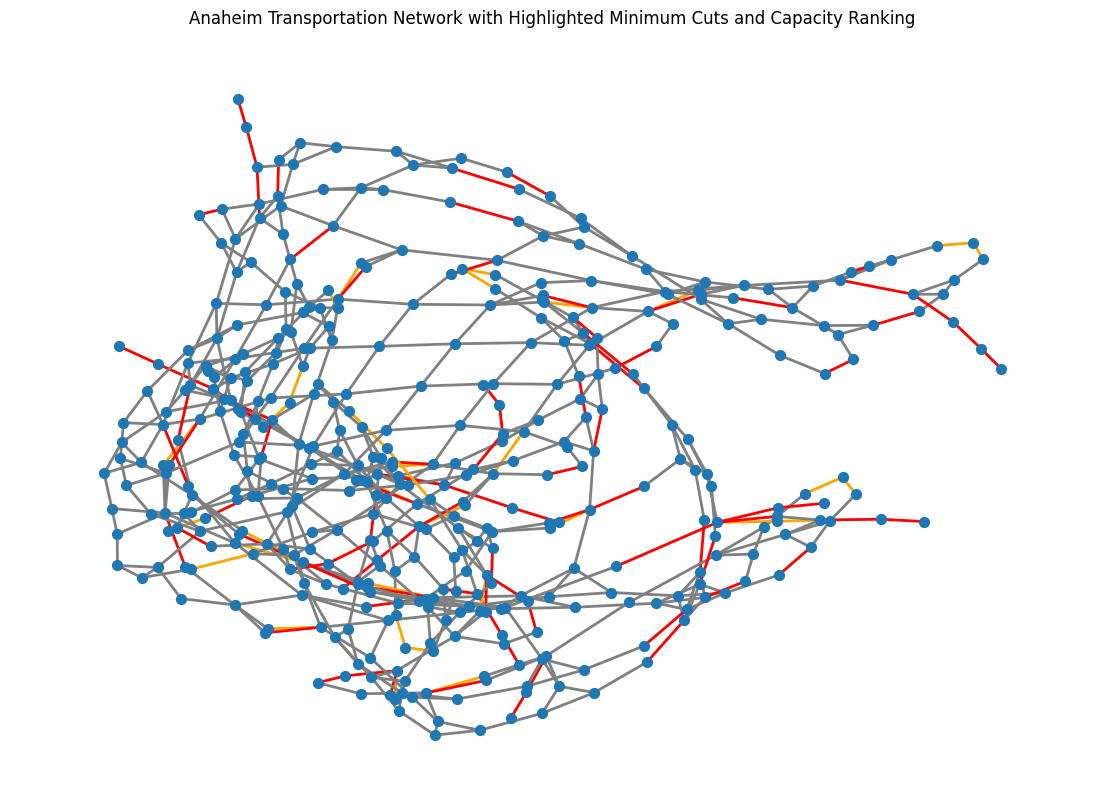

In [48]:
plt.figure(figsize=(14, 10))
plt.title("Anaheim Transportation Network with Highlighted Minimum Cuts and Capacity Ranking")
# 'pos' and 'edge_color_list' were generated in previous steps
nx.draw(UG, pos, node_size=50, edge_color=edge_color_list, with_labels=False, width=2)

plt.figure(figsize=(14, 10)): یک شکل بزرگ برای رسم گراف ایجاد می‌کند

plt.title(...): عنوان نمودار

nx.draw(...): گراف بدون‌جهت UG را رسم می‌کند

pos: مختصات نودها (از قبل با spring_layout محاسبه شده)

node_size=50: اندازه نودها کوچک است

edge_color=edge_color_list: رنگ یال‌ها از قبل تعیین شده (خاکستری، زرد، نارنجی، قرمز بر اساس ظرفیت برش)

with_labels=False: برچسب نودها نمایش داده نمی‌شود

width=2: ضخامت یال‌ها

## 2. ساخت دیکشنری رتبه نودها

### Map nodes from the min_cuts DataFrame to positions and ranks


---

### نقاط را از چارچوب داده‌های min_cuts به موقعیت‌ها و رده‌ها نگاشته کنید



In [49]:
node_ranks = {}
for index, row in df_min_cuts.iterrows():
    # For simplicity in visualization, we'll associate the rank with both nodes of the cut
    # A more sophisticated approach might be needed for complex interpretations
    u = row['u']
    v = row['v']
    rank = row['Rank by Capacity']
    # Store the maximum rank if a node is part of multiple cuts
    node_ranks[u] = max(node_ranks.get(u, 0), rank)
    node_ranks[v] = max(node_ranks.get(v, 0), rank)

df_min_cuts: دیتافریم شامل برش‌های کمینه و رتبه‌بندی آن‌ها

**برای هر برش (یال u-v):**

رتبه‌ی ظرفیت (Rank by Capacity) گرفته می‌شود

این رتبه به هر دو نود u و v نسبت داده می‌شود

اگر یک نود در چند برش ظاهر شود، بیشترین رتبه ذخیره می‌شود

**ایده:**

 نودهایی که در برش‌های مهم‌تر ظاهر می‌شوند، باید در تجسم برجسته‌تر شوند

## 3. آماده‌سازی داده برای scatter plot

In [50]:
scatter_x = [pos[node][0] for node in node_ranks.keys()]
scatter_y = [pos[node][1] for node in node_ranks.keys()]
scatter_color = [node_ranks[node] for node in node_ranks.keys()]
scatter_size = [node_ranks[node] * 5 + 20 for node in node_ranks.keys()] # Scale size by rank


مختصات x و y هر نود از pos گرفته می‌شود

رنگ هر نود بر اساس رتبه‌اش تعیین می‌شود (scatter_color)

اندازه‌ی هر نود متناسب با رتبه بزرگ‌تر یا کوچک‌تر می‌شود (scatter_size)

** ایده: **

 نودهای بحرانی‌تر (رتبه پایین‌تر) با رنگ و اندازه متفاوت مشخص شوند.

## 4. رسم scatter plot روی گراف



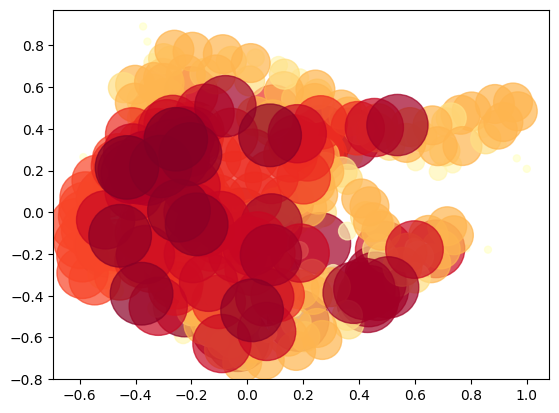

In [51]:
scatter = plt.scatter(scatter_x, scatter_y, c=scatter_color, s=scatter_size, cmap='YlOrRd', alpha=0.7, label='Rank by Capacity')


**plt.scatter:**

 نقاط (نودها) را روی همان شکل رسم می‌کند

**c=scatter_color:**

رنگ هر نقطه بر اساس رتبه

**s=scatter_size:**

 اندازه هر نقطه بر اساس رتبه

**cmap='YlOrRd': **

نقشه رنگی زرد→نارنجی→قرمز (شدت بیشتر = بحرانی‌تر).

**alpha=0.7:**

 شفافیت برای دید بهتر.

 این لایه‌ی اضافه باعث می‌شود نودهای بحرانی‌تر به‌صورت بصری برجسته شوند

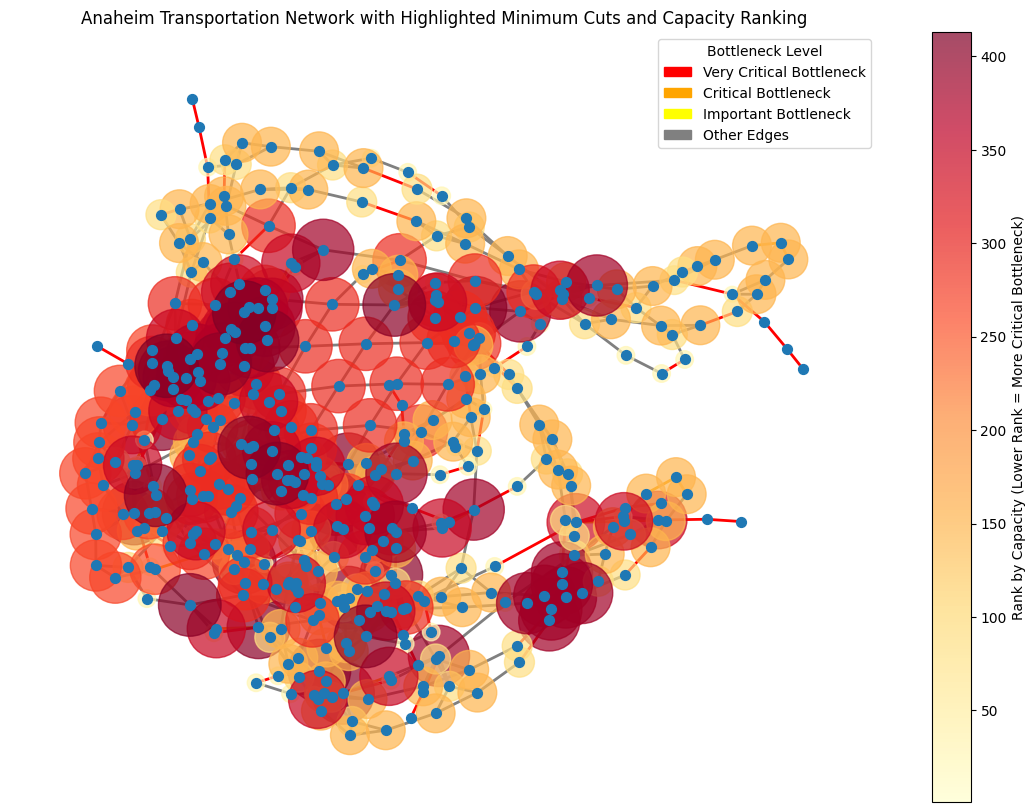

In [ ]:
scatter = plt.scatter(scatter_x, scatter_y, c=scatter_color, s=scatter_size, cmap='YlOrRd', alpha=0.7, label='Rank by Capacity')

# 5. افزودن colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Rank by Capacity (Lower Rank = More Critical Bottleneck)')

#یک نوار رنگی کنار نمودار اضافه می‌شود
# توضیح می‌دهد که رنگ‌ها چه معنایی دارند (رتبه پایین‌تر = گلوگاه بحرانی‌تر)


# 6. افزودن legend برای یال‌ها
## (bottleneck levels) - manual creation needed
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Very Critical Bottleneck')
orange_patch = mpatches.Patch(color='orange', label='Critical Bottleneck')
yellow_patch = mpatches.Patch(color='yellow', label='Important Bottleneck')
gray_patch = mpatches.Patch(color='gray', label='Other Edges')

plt.legend(handles=[red_patch, orange_patch, yellow_patch, gray_patch], title="Bottleneck Level")

# Step 6: Display the enhanced plot
plt.show()

یک legend دستی ساخته می‌شود تا رنگ یال‌ها توضیح داده شود:

* قرمز = خیلی بحرانی

* نارنجی = بحرانی

* زرد = مهم

* خاکستری = سایر یال‌ها

 این قسمت در واقع `تجسم پیشرفته‌ی شبکه آناهیم` است که علاوه بر رنگ‌آمیزی یال‌ها **(بر اساس ظرفیت برش‌ها**)، یک لایه‌ی اضافه (scatter plot) روی نودها قرار می‌دهد تا ***اهمیت نسبی گلوگاه‌***ها را هم نشان دهد.

## Summary:

### Data Analysis Key Findings

*   The minimum capacity among the identified minimum cuts is 5400.0, and the maximum capacity is 36000.0.
*   Based on the defined capacity thresholds, edges with capacities up to approximately 15600.0 are classified as 'very critical' (red), up to approximately 25800.0 as 'critical' (orange), and above that as 'important' (yellow).
*   The initial analysis of the top 20 minimum cuts revealed that many of them have the same minimum capacity (5400.0).
*   Three metrics were calculated to assess the significance of minimum cuts based on their capacity: Rank by Capacity, Normalized Capacity (0-1 scale), and Difference from Maximum Capacity.
*   For the minimum cuts with the lowest capacity (5400.0), all three metrics indicate high significance: Rank 1, Normalized Capacity 0.0, and a large Difference from Maximum Capacity (30600.0).
*   The visualization successfully highlights the minimum cut edges on the original network graph using a color scheme based on their capacity levels.
*   An overlaid scatter plot effectively visualizes the 'Rank by Capacity' metric for nodes involved in minimum cuts, using color and size to indicate relative criticality.

### Insights or Next Steps

*   While the current metrics provide insight into bottlenecks based on capacity, incorporating demand or flow data would allow for a more comprehensive evaluation of their real-world impact.
*   Further analysis could focus on identifying specific paths or regions most affected by the identified critical bottlenecks to inform targeted infrastructure improvements or traffic management strategies.


# Gomory-Hu Tre




[Gomory-Hu Tre - GeeksForGeeks](https://www.geeksforgeeks.org/dsa/gomory-hu-tree-introduction/)

In [8]:
!pip install networkx


In [9]:
import math
import random
import itertools
from typing import Tuple, List, Dict, Set

import networkx as nx


## ساخت یک گراف نمونه بدون‌جهت با وزن‌های نامنفی


گراف کوچک ۸ نودی برای تست الگوریتم

In [10]:
def build_sample_transport_graph() -> nx.Graph:
    G = nx.Graph()
    # تعریف رأس‌ها
    num_nodes = 8
    G.add_nodes_from(range(num_nodes))
    # یال‌ها با وزن (ظرفیت)
    edges = [
        (0, 1, 5), (0, 2, 3),
        (1, 2, 2), (1, 3, 4),
        (2, 3, 2), (2, 4, 6),
        (3, 4, 3), (3, 5, 5),
        (4, 5, 4), (4, 6, 7),
        (5, 7, 6), (6, 7, 5),
        (1, 6, 1), (2, 7, 2)
    ]
    for u, v, w in edges:
        assert w >= 0, "وزن‌ها باید نامنفی باشند."
        G.add_edge(u, v, weight=w)
    return G

G = build_sample_transport_graph()
print(f"Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")


Nodes: 8, Edges: 14


## پیاده‌سازی دستی الگوریتم گوموری–هو


Key idea:

 For each vertex u (except the root), `compute the minimum cut between u and its parent p`; the **weight of the edge (u, p)** in the tree is equal to **the value of the cut**; then change the parent of the vertices that are in the reachable section of u to u.





**پیچیدگی:**

 n−1 بار اجرای min-cut (که خود معادل max-flow است).

In [11]:
def gomory_hu_tree_manual(G: nx.Graph, capacity_key: str = "weight") -> nx.Graph:
    """
    ساخت درخت گوموری–هو بر اساس الگوریتم کلاسیک.
    ورودی: گراف بدون‌جهت با وزن‌های نامنفی.
    خروجی: درخت وزن‌دار T با n-1 یال.
    """
    # نگاشت شاخص‌ها به لیست ثابت از گره‌ها برای نمایه‌گذاری
    nodes = list(G.nodes())
    idx_of = {nodes[i]: i for i in range(len(nodes))}
    parent = [0] * len(nodes)   # والد هر رأس در درخت GH (بر اساس ایندکس)
    T = nx.Graph()

    # ریشه را رأس 0 (بر اساس ترتیب nodes) در نظر می‌گیریم
    for u_idx in range(1, len(nodes)):
        u = nodes[u_idx]
        p = nodes[parent[u_idx]]

        # محاسبه‌ی برش کمینه بین u و p
        cut_value, partition = nx.minimum_cut(G, u, p, capacity=capacity_key)
        reachable, non_reachable = partition  # بخش‌هایی از گره‌ها پس از برش

        # افزودن یال به درخت با وزن مقدار برش
        T.add_edge(u, p, weight=cut_value)

        # به‌روزرسانی والدها: هر رأسی که والدش p است و در بخش reachable با u قرار دارد، والدش u می‌شود
        for v_idx in range(u_idx + 1, len(nodes)):
            v = nodes[v_idx]
            if parent[v_idx] == parent[u_idx] and v in reachable:
                parent[v_idx] = u_idx

    return T

T = gomory_hu_tree_manual(G)
print("Gomory-Hu Tree edges (u - v | min-cut):")
for u, v, d in T.edges(data=True):
    print(f"{u} - {v} | {d['weight']}")


Gomory-Hu Tree edges (u - v | min-cut):
1 - 0 | 8
1 - 2 | 10
2 - 3 | 14
2 - 4 | 15
4 - 5 | 15
4 - 6 | 13
4 - 7 | 13


برای هر رأس
𝑢
 (به جز ریشه):

min-cut بین
𝑢
 و والدش محاسبه می‌شود

یال
(
𝑢
,
𝑝
)
 با وزن مقدار برش به درخت اضافه می‌شود

والد رأس‌های دیگر در بخش قابل‌دسترس به‌روزرسانی می‌شود

## اعتبارسنجی ویژگی مسیر کمینه در درخت گوموری–هو


**ویژگی کلیدی**

 min-cut بین هر دو رأس

 =

 کمترین وزن یال در مسیر درخت GH

In [17]:
def path_min_edge_weight_in_tree(T: nx.Graph, s: int, t: int, weight_key: str = "weight") -> float:
    path = nx.shortest_path(T, s, t)  # چون T درخت است، مسیر یکتاست؛ وزن‌ها برای مسیر مهم نیستند
    min_w = math.inf
    for a, b in zip(path, path[1:]):
        w = T[a][b][weight_key]
        min_w = min(min_w, w)
    return min_w

# مقایسه چند جفت رأس
pairs_to_check = [(0, 7), (1, 6), (2, 5), (3, 4)]
print("Validation of GH property (min-cut == min-edge on path in T):")
for s, t in pairs_to_check:
    cut_val, _ = nx.minimum_cut(G, s, t, capacity="weight")
    tree_min_edge = path_min_edge_weight_in_tree(T, s, t)
    print(f"pair ({s}, {t}) -> min-cut(G)={cut_val}, min-edge-path(T)={tree_min_edge}")


Validation of GH property (min-cut == min-edge on path in T):
pair (0, 7) -> min-cut(G)=8, min-edge-path(T)=8
pair (1, 6) -> min-cut(G)=10, min-edge-path(T)=10
pair (2, 5) -> min-cut(G)=15, min-edge-path(T)=15
pair (3, 4) -> min-cut(G)=14, min-edge-path(T)=14


## تجسم گراف اصلی و درخت گوموری–هو


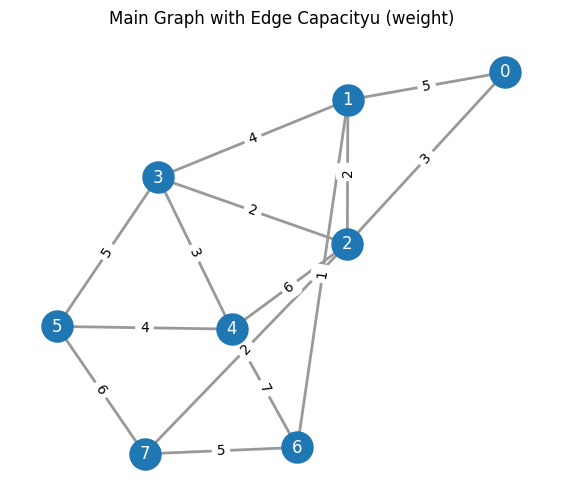

In [19]:
import matplotlib.pyplot as plt

pos_G = nx.spring_layout(G, seed=42)
plt.figure(figsize=(7, 6))
nx.draw_networkx_nodes(G, pos_G, node_color="#1f77b4", node_size=500)
nx.draw_networkx_edges(G, pos_G, edge_color="#999999", width=2)
nx.draw_networkx_labels(G, pos_G, font_color="white")
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos_G, edge_labels=edge_labels)
plt.title("Main Graph with Edge Capacityu (weight)")
plt.axis("off")
plt.show()


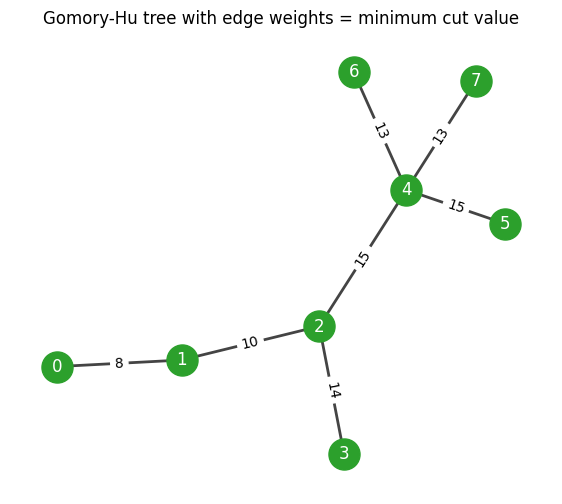

In [24]:
pos_T = nx.spring_layout(T, seed=7)
plt.figure(figsize=(7, 6))
nx.draw_networkx_nodes(T, pos_T, node_color="#2ca02c", node_size=500)
nx.draw_networkx_edges(T, pos_T, edge_color="#444444", width=2)
nx.draw_networkx_labels(T, pos_T, font_color="white")
edge_labels_T = nx.get_edge_attributes(T, "weight")
nx.draw_networkx_edge_labels(T, pos_T, edge_labels=edge_labels_T)
plt.title("Gomory-Hu tree with edge weights = minimum cut value")
plt.axis("off")
plt.show()


## آزمایش روی گراف تصادفی با وزن‌های نامنفی


In [25]:
def build_random_graph(n=12, p=0.2, w_low=1, w_high=8, seed=123) -> nx.Graph:
    rng = random.Random(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if rng.random() < p:
                w = rng.randint(w_low, w_high)
                G.add_edge(i, j, weight=w)

    return G

G_rand = build_random_graph()
T_rand = gomory_hu_tree_manual(G_rand)
print(f"Random Graph: |V|={G_rand.number_of_nodes()}, |E|={G_rand.number_of_edges()}")
print("GH Tree edges (random graph):")
for u, v, d in T_rand.edges(data=True):
    print(f"{u} - {v} | {d['weight']}")


Random Graph: |V|=12, |E|=13
GH Tree edges (random graph):
1 - 0 | 5
1 - 2 | 2
1 - 3 | 7
1 - 4 | 3
1 - 5 | 6
1 - 7 | 8
1 - 8 | 6
1 - 10 | 1
2 - 6 | 5
4 - 11 | 8
8 - 9 | 6


## بررسی صحت ویژگی مسیر در گراف تصادفی


In [16]:
pairs = [(0, 5), (3, 9), (1, 8), (2, 10)]
print("Validation on random graph:")
for s, t in pairs:
    # اطمینان از وجود رأس‌ها
    if s in G_rand.nodes and t in G_rand.nodes:
        cut_val, _ = nx.minimum_cut(G_rand, s, t, capacity="weight")
        tree_min_edge = path_min_edge_weight_in_tree(T_rand, s, t)
        print(f"pair ({s},{t}) -> min-cut(G)={cut_val}, min-edge-path(T)={tree_min_edge}")


Validation on random graph:
pair (0,5) -> min-cut(G)=5, min-edge-path(T)=5
pair (3,9) -> min-cut(G)=6, min-edge-path(T)=6
pair (1,8) -> min-cut(G)=6, min-edge-path(T)=6
pair (2,10) -> min-cut(G)=1, min-edge-path(T)=1


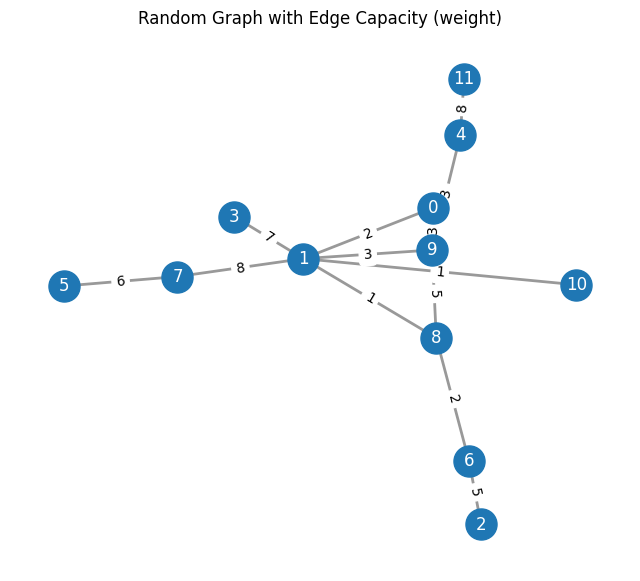

In [33]:
import matplotlib.pyplot as plt
import networkx as nx
import random

# Regenerate the random graph G_rand to ensure the variable holds the graph object
def build_random_graph(n=12, p=0.2, w_low=1, w_high=8, seed=123) -> nx.Graph:
    rng = random.Random(seed)
    G = nx.Graph()
    G.add_nodes_from(range(n))
    for i in range(n):
        for j in range(i+1, n):
            if rng.random() < p:
                w = rng.randint(w_low, w_high)
                G.add_edge(i, j, weight=w)
    return G

G_rand = build_random_graph()


# Visualize the original random graph G_rand
pos_G_rand = nx.spring_layout(G_rand, seed=42) # Use a seed for reproducible layout
plt.figure(figsize=(8, 7))
nx.draw_networkx_nodes(G_rand, pos_G_rand, node_color="#1f77b4", node_size=500)
nx.draw_networkx_edges(G_rand, pos_G_rand, edge_color="#999999", width=2)
nx.draw_networkx_labels(G_rand, pos_G_rand, font_color="white")
edge_labels_G_rand = nx.get_edge_attributes(G_rand, "weight")
nx.draw_networkx_edge_labels(G_rand, pos_G_rand, edge_labels=edge_labels_G_rand)
plt.title("Random Graph with Edge Capacity (weight)")
plt.axis("off")
plt.show()

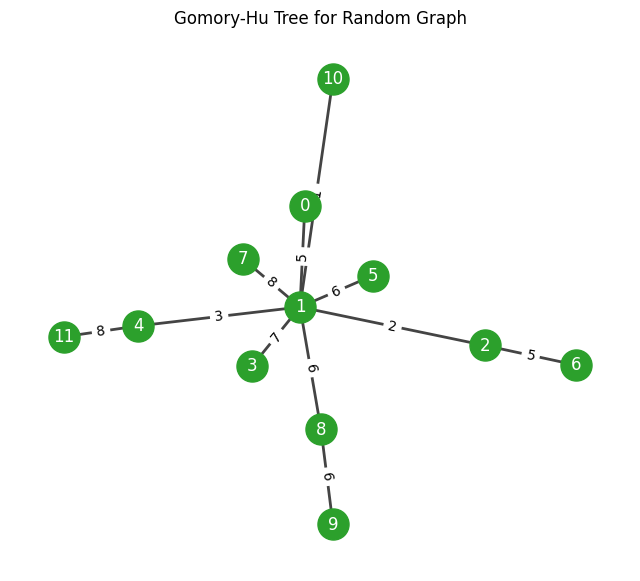

In [32]:
# Visualize the manually constructed Gomory-Hu tree T_rand for G_rand
pos_T_rand = nx.spring_layout(T_rand, seed=7) # Use a different seed for tree layout
plt.figure(figsize=(8, 7))
nx.draw_networkx_nodes(T_rand, pos_T_rand, node_color="#2ca02c", node_size=500)
nx.draw_networkx_edges(T_rand, pos_T_rand, edge_color="#444444", width=2)
nx.draw_networkx_labels(T_rand, pos_T_rand, font_color="white")
edge_labels_T_rand = nx.get_edge_attributes(T_rand, "weight")
nx.draw_networkx_edge_labels(T_rand, pos_T_rand, edge_labels=edge_labels_T_rand)
plt.title("Gomory-Hu Tree for Random Graph")
plt.axis("off")
plt.show()

آزمایش روی گراف تصادفی
ساخت گراف تصادفی با احتمال p برای یال‌ها

اجرای الگوریتم GH دستی روی آن

بررسی صحت ویژگی مسیر